In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#importing the data as a Pandas DataFrame
dataset=pd.read_csv(r"C:\Users\SANJEEV SRIDEVI\AA skill lync\intership\Project 6\working\City_day_data.csv",encoding="ISO-8859-1")
dataset.describe()



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India.

Where SO2 and NO2 are harmful gaseous emmissions; rspm, spm and pm2_5 come under susended air pollutants.

> The count clearly shows that there are variable number of Non-null entries for each of the pollutants.

> To understand the dataset further, we will have a look at all the different columns now and store them for future reference.




In [3]:
dataset.columns
#Apart from the major pollutants, there are columns that refer to the respective states, agencies, sampling dates and the type.
#We will now have a look at what kind of data each of the columns consists of.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

Understanding the pollutants briefly here.

**NO2**: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

**SO2**: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

**spm**: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

**rspm**: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

**pm2_5**: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.

Let us get back to the data again and see how it is stored.


In [4]:

dataset.info()

#Now, we can immediatly see that there are quite a few nulls in various columns, which need work and first need a closer inspection.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


Clearly there are lots of null values, noticeably in stn_code,agency, both of which should therefore be not ncluded further in the analysis.

> Intuitively, these two columns will hardly add much value to analysis.

> Now, focusing on the categorical variables, we are left with location_monitoring_station which consists of considerable nulls (approximately 27000). 

****It would have been useful to have those values for an in depth analysis, but for now we will keep it out because of the null values and come back later if needed.

1. Out of the two dates columns, immediate attention goes to sampling date which has different formats within, highlighting some data input issues.
1. While, it is importnat to have this metric, more useful is to go back to the origin of the dataset and ask relevant questions,as to why are there different formats? Is it a human error or error due to incorporating different formats.For now, we will keep it out and only have the date column.

In [6]:

dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [9]:
pip install scikit-learn==0.20.4

  Using cached scikit-learn-0.20.4.tar.gz (11.7 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\programdata\anaconda3\lib\site-packages\scikit_learn-0.24.2.dist-info\
   from C:\ProgramData\Anaconda3\Lib\site-packages\~cikit_learn-0.24.2.dist-info
  Moving to c:\programdata\anaconda3\lib\site-packages\sklearn\
   from C:\ProgramData\Anaconda3\Lib\site-packages\~klearn
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SANJEEV SRIDEVI\\AppData\\Local\\Temp\\pip-install-_nl53rll\\scikit-learn_77832236ae2c48778850ca5ee4d01d98\\setup.py'"'"'; __file__='"'"'C:\\Users\\SANJEEV SRIDEVI\\AppData\\Local\\Temp\\pip-install-_nl53rll\\scikit-learn_77832236ae2c48778850ca5ee4d01d98\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\SANJEEV SRIDEVI\AppData\Local\Temp\pip-wheel-0fvscea4'
       cwd: C:\Users\SANJEEV SRIDEVI\AppData\Local\Temp\pip-install-_nl53rll\scikit-learn_77832236ae2c48778850ca5ee4d01d98\
  Complete output (682 lines):
  Partial import of sklearn during the build process.
  IN

  copying sklearn\linear_model\coordinate_descent.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\huber.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\least_angle.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\logistic.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\omp.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\passive_aggressive.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\perceptron.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\randomized_l1.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\ransac.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\ridge.py -> build\lib.win-amd64-3.9\sklearn\linear_model
  copying sklearn\linear_model\sag.py -> build\lib.win-amd64-3.9\sklearn\

In [10]:
#Fixing the missing values firstly for all the pollutants.
#We will consider taking mean for all the pollutants columns and make use of the Imputer class
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(dataset.iloc[:, 3:8].values)
dataset.iloc[:,3:8] = imputer.transform(dataset.iloc[:, 3:8].values)
dataset.info()
dataset.head()

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)


    copying sklearn\cluster\tests\test_birch.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\test_dbscan.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\test_feature_agglomeration.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\test_hierarchical.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\test_k_means.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\test_mean_shift.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\test_spectral.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    copying sklearn\cluster\tests\__init__.py -> build\lib.win-amd64-3.9\sklearn\cluster\tests
    creating build\lib.win-amd64-3.9\sklearn\datasets
    copying sklearn\datasets\base.py -> build\lib.win-amd64-3.9\sklearn\datasets
    copying sklearn\datasets\california_housing.py -> bu

In [8]:
#Fixing the missing values in the column 'type'
dataset['type'].describe()
#With 10 Unique labels, we will fill the null values by the most common type, which is 'Residential, Rural and Other Areas'.
common_value='Residential,Rural and other Areas'
dataset['type']=dataset['type'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      435742 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


We have fixed the missing values now and made the dataset much shorter to focus on the key variables.
> We should start with some preliminary visualisations, starting foremost with those of the pollutants

In [11]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

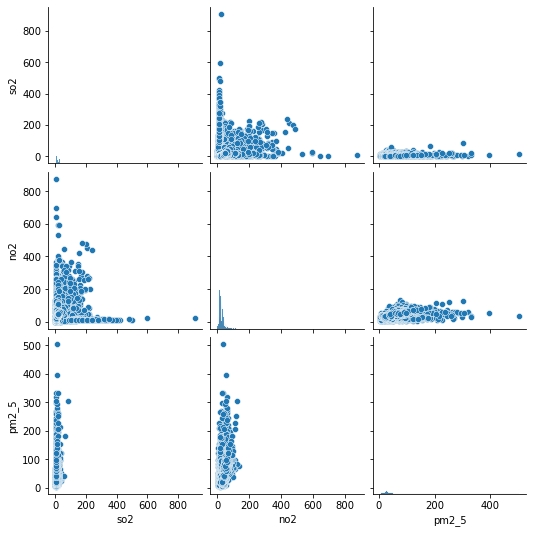

In [12]:
#We will start with pairplots to undestand the statistics and get a general idea about the interdependence of pollutants.
sns.pairplot(dataset[['so2','no2','pm2_5']])



**The idea is to understand through data, whether NO2 and SO2 have a role in particulate formation or not?
> Clearly there is some interdependence between SO2 and NO2, but no clear trend can be seen for pm2_5.
> Although, making fair asumptions would be premature as there were large number of missing values for pm2_5 as seen earlier.

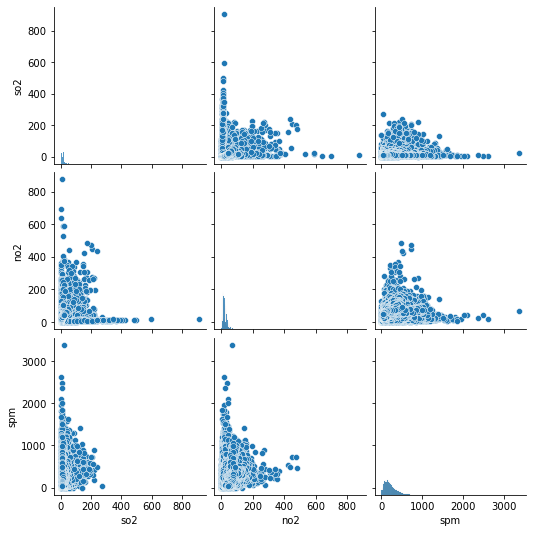

In [13]:
sns.pairplot(dataset[['so2','no2','spm']])


****So, now we see some trend. spm emmissions do demonstrate some relation with No2 and So2 emmissions. 
* As the emmissions for NO2 increase, the spm emmissions demonstrate a slight increase.
> The right questions, here, therefore could be: Is there any percentage of No2 that gets converted to spm?
> It will be useful to get this answer as spm are known to have quite a harmful effect on human health.

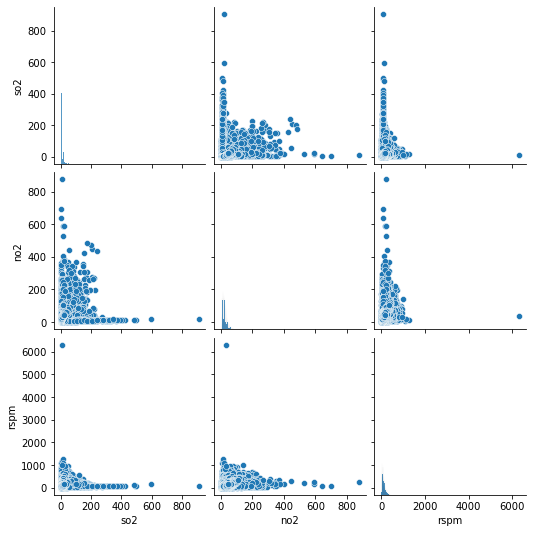

In [14]:
sns.pairplot(dataset[['so2','no2','rspm']])


Again, nothing in this plot, that can be singled out here as a defining trend. 
> Either the data is not enough or clearly rspm presence in atmosphere is independent of NO2 or SO2 presence.

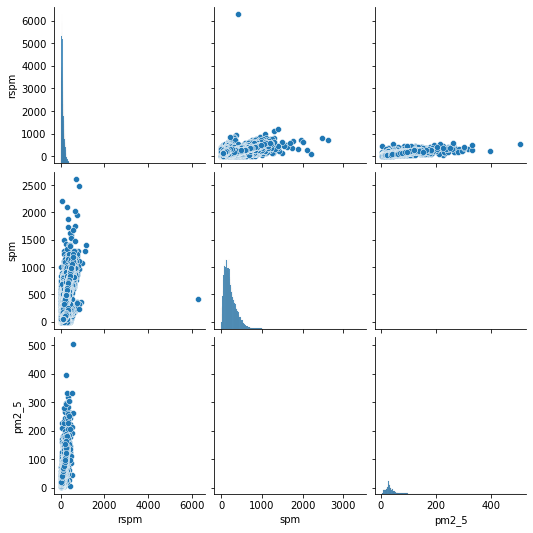

In [15]:
sns.pairplot(dataset[['rspm','spm','pm2_5']])


**Atleast according to the data, all the three different suspended particulates seem to have very less interdependence.
* Suggestive of different origins for each of them or different methods of sampling them.
* We always need to be mindful of the fact that pm2_5 has a lot of nulls and a large part of it was computed by taking mean.

****It is good to have all the emmissions athe same place by making use of subplots.
> Making subplots for emmissions data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='spm', ylabel='Density'>

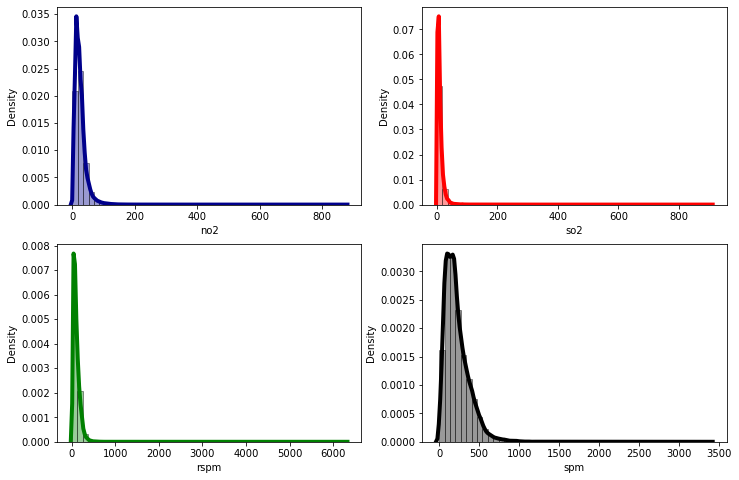

In [16]:

fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(dataset['no2'],hist=True,kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][0])

sns.distplot(dataset['so2'],hist=True,kde=True,
             color='red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][1])

sns.distplot(dataset['rspm'],hist=True,kde=True,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][0])

sns.distplot(dataset['spm'],hist=True,kde=True,
             color='black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][1])

<AxesSubplot:>

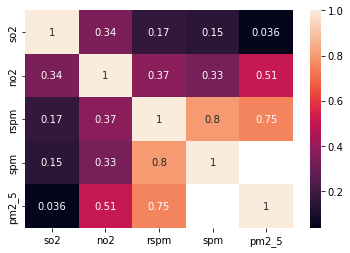

In [17]:
sns.heatmap(
    dataset.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)


****Interesting outcome. From the correlations, spm and rspm show a high value, followed by that of rspm and NO2.
* It could again highlight some important aspect of qualitative analysis that should be added here. 
> Can we say something about spm and rspm? or rspm and NO2?

# Grouping the emmissions by state.
> Having looked at the pollutants distributions, we now would focus on how these emmissions are stacked across the indian states.
> We will use groupby on the dataset DataFrame and store it in another DataFrame as statewise_emmissions.

<AxesSubplot:xlabel='state'>

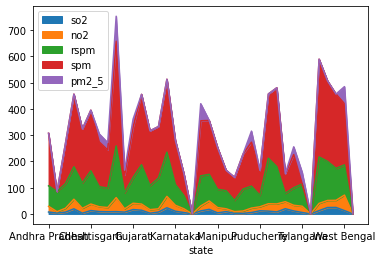

In [18]:

statewise_emmissions = dataset.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
statewise_emmissions.plot.area()
 


***The highest emmissions are for spm, for each of the states.*

> Getting the statistics for highest emmissions, when grouped statewise.

In [19]:
statewise_emmissions.describe()


,so2,no2,rspm,spm,pm2_5
count,34.000000,34.000000,34.000000,32.000000,10.000000
mean,10.489046,22.860877,100.862013,197.679359,44.877515
std,6.410298,11.884855,41.223317,84.919045,23.444821
min,2.059736,5.469697,32.000000,67.254193,18.855612
25%,5.744773,14.915142,74.446205,142.588924,29.790737
50%,8.947747,21.652826,92.797557,198.240715,36.466892
75%,12.787148,27.106787,123.202467,250.755396,59.660200
max,24.697736,59.075731,196.639771,399.402088,95.113208


In [20]:
Top10States_with_highest_No2=statewise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['no2']]
Top10States_with_highest_No2_sorted.head()

,no2
state,
West Bengal,59.075731
Delhi,53.489147
Jharkhand,43.366341
Bihar,36.575525
Maharashtra,32.115370


1. West Bengal and Delhi show the highest NO2 emmissions over the years.
1. Questions to ask: Have the Vehicles emmiting NOx and NO2 have been monitored well in these two states?
1. What type of Industrial waste is being generated in these two states?

In [21]:
Top10states_with_highest_So2=statewise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top10states_with_highest_So2_sorted=Top10states_with_highest_So2.loc[:,['so2']]
Top10states_with_highest_So2_sorted.head()

,so2
state,
Uttaranchal,24.697736
Uttarakhand,24.372957
Jharkhand,23.485794
Sikkim,19.800000
Bihar,19.381476


1. With Uttaranachal and Jharkand right at the top, it would be wise to ask whether the coal mining industry in these two states regulated well, as a substantial amount of SO2 emmission can come from the combustion of coal.
> Importantly, there are no states from South India.

In [22]:
Top10states_with_highest_rspm=statewise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10states_with_highest_rspm_sorted=Top10states_with_highest_rspm.loc[:,['rspm']]
Top10states_with_highest_rspm_sorted.head()

,rspm
state,
Delhi,196.639771
Uttar Pradesh,176.952308
Punjab,173.493711
Jharkhand,168.517763
Haryana,149.860537


In [23]:
Top10states_with_highest_spm=statewise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top10states_with_highest_spm_sorted=Top10states_with_highest_spm.loc[:,['spm']]
Top10states_with_highest_spm_sorted.head()

,spm
state,
Delhi,399.402088
Uttar Pradesh,372.663688
Uttarakhand,306.758923
Rajasthan,300.735397
Uttaranchal,283.335714


****The distribution for spm is generally on the higher side, but Delhi and Uttar Pradesh show the highest presence of suspended Particulate matter.

1. Are their specific insustries that contribute higher to the spm concentration in and around Delhi?
> To be underlined is the non-presence of Southern and North eastern states.

In [24]:
Top10states_with_highest_pm2_5=statewise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top10states_with_highest_pm2_5_sorted=Top10states_with_highest_pm2_5.loc[:,['pm2_5']]
Top10states_with_highest_pm2_5_sorted.head()

,pm2_5
state,
Delhi,95.113208
Madhya Pradesh,65.064565
West Bengal,64.890625
Telangana,43.968927
Odisha,42.204089


> The data output can be misleading owing to the missing values of pm2_5 values and subsequent mean.
> Neverthless, Delhi still shows highest measured value of pm2_5.


In [25]:
#Getting the statistics citywise for the pollutants
locationwise_emmissions=dataset.groupby('location').mean()[['so2','no2','rspm','spm','pm2_5']]

In [26]:
Top10Cities_with_highest_NO2=locationwise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10Cities_with_highest_NO2_sorted=Top10Cities_with_highest_NO2.loc[:,['no2']]
Top10Cities_with_highest_NO2_sorted.head()


,no2
location,
Howrah,78.008630
Badlapur,64.451282
Dombivli,60.568000
Kolkata,60.294630
Ulhasnagar,59.783158


In [27]:

Top10Cities_with_highest_So2=locationwise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top10Cities_with_highest_So2_sorted=Top10Cities_with_highest_So2.loc[:,['so2']]
Top10Cities_with_highest_So2_sorted.head()



,so2
location,
Byrnihat,45.475065
Gajroula,44.339106
Jamshedpur,38.184288
Nanded,38.097834
Dharuhera,37.800000


In [28]:
Top10Cities_with_highest_rspm=locationwise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10Cities_with_highest_rspm_sorted=Top10Cities_with_highest_rspm.loc[:,['rspm']]
Top10Cities_with_highest_rspm_sorted.head()

,rspm
location,
Ghaziabad,250.513254
West Singhbhum,246.417219
Bareilly,233.038058
Allahabad,230.810709
Ludhiana,218.633713


In [29]:
Top10Cities_with_highest_spm=locationwise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top10Cities_with_highest_spm_sorted=Top10Cities_with_highest_spm.loc[:,['spm']]
Top10Cities_with_highest_spm_sorted.head()

,spm
location,
Meerut,595.135118
"Noida, Ghaziabad",502.095238
Allahabad,418.918985
Khurja,412.856347
Kanpur,412.610107


In [30]:
Top10Cities_with_highest_pm2_5=locationwise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top10Cities_with_highest_pm2_5_sorted=Top10Cities_with_highest_pm2_5.loc[:,['pm2_5']]
Top10Cities_with_highest_pm2_5_sorted.head()

,pm2_5
location,
Delhi,95.113208
Talcher,82.394231
Bhopal,79.100000
Gwalior,77.187417
Barrackpore,75.750000


In [31]:
#Visualising the emmissions according to the type and getting the relevant statistics
type_emmissions=dataset.groupby('type').mean()[['so2','no2','rspm','spm','pm2_5']]
type_emmissions.head()


,so2,no2,rspm,spm,pm2_5
type,,,,,
Industrial,27.130601,37.864767,NaN,302.955752,NaN
Industrial Area,13.212287,29.171192,121.495900,226.474079,44.106987
Industrial Areas,13.765723,29.991727,123.028427,249.227238,NaN
RIRUO,10.912577,31.779908,103.617331,NaN,37.816291
Residential,15.227778,19.492857,NaN,274.717105,NaN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

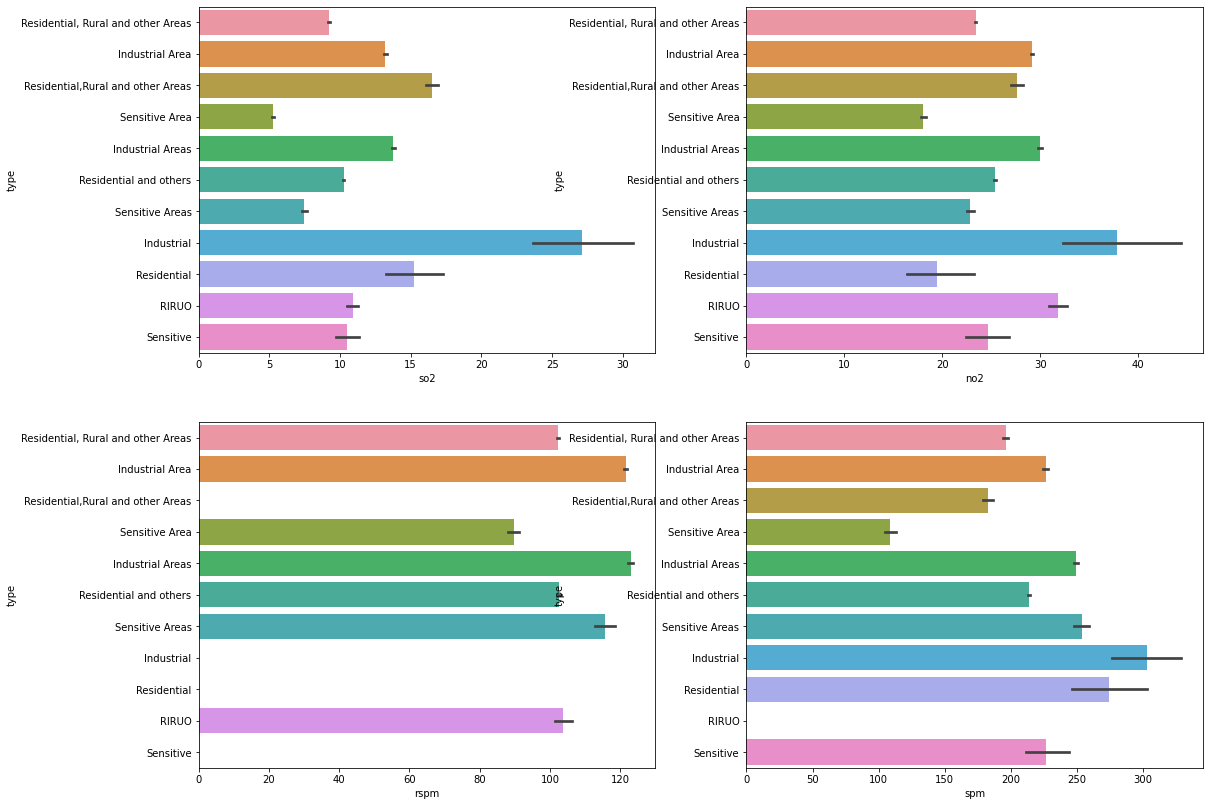

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("so2", y="type",
                 data=dataset,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=dataset,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=dataset,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=dataset,
                 ax=axes[1,1]
                )

* Largely it is the Industrial affluents that contribute highest percentage of all the pollutants in India.

In [33]:
#Understanding the emmissions with time
dataset['date'].describe()


count        435735
unique         5067
top       3/19/2015
freq            253
Name: date, dtype: object

* There are exactly seven missing date values and as we can see there are multiple measurements for the same date.
* While dropping the missing dates might seem easiest, we might loose out on some important information.
> Therefore, we will fix this by filling in the missing values by the most frequent values.

In [34]:
dataset.head()
common_value_date='2015-03-19'
dataset['date']=dataset['date'].fillna(common_value_date)
dataset.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,12/24/2015
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,12/29/2015
435739,andaman-and-nicobar-islands,NaN,"Residential,Rural and other Areas",NaN,NaN,NaN,NaN,NaN,2015-03-19
435740,Lakshadweep,NaN,"Residential,Rural and other Areas",NaN,NaN,NaN,NaN,NaN,2015-03-19
435741,Tripura,NaN,"Residential,Rural and other Areas",NaN,NaN,NaN,NaN,NaN,2015-03-19


* Visualising the Emmissions over the years, by grouping the dataset datewise and creating a new DataFrame for each of the five listed pollutants.

In [35]:
datewise_emmissions_SO2=dataset.groupby('date').mean()['so2']
datewise_emmissions_NO2=dataset.groupby('date').mean()['no2']
datewise_emmissions_rspm=dataset.groupby('date').mean()['rspm']
datewise_emmissions_spm=dataset.groupby('date').mean()['spm']




<AxesSubplot:xlabel='date'>

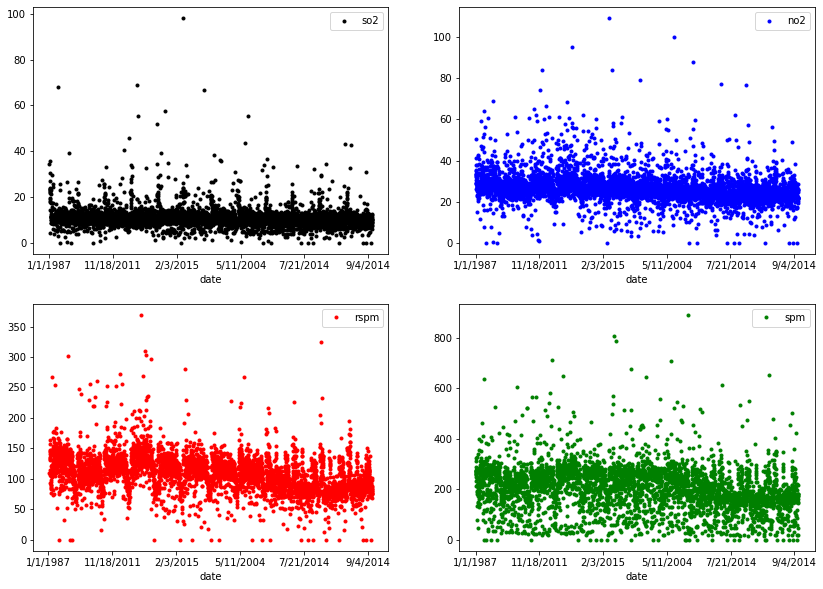

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
datewise_emmissions_SO2.plot(style='k.',legend=True,ax=axes[0,0])
datewise_emmissions_NO2.plot(style='b.',legend=True,ax=axes[0,1])
datewise_emmissions_rspm.plot(style='r.',legend=True,ax=axes[1,0])
datewise_emmissions_spm.plot(style='g.', legend=True,ax=axes[1,1])


* So2 emmissions it appears showed a lot of variable readings in the 1990's when the measurements started, but since, the emmissions have been localised within a range and even started showing slight downward trend lately.

* NO2 emmissions it appears shows higher variations in the emmissions readings across India.
> Are there some particular months or times of the year which shows higher No2 emmissions?

* Largely distributed within a certain range of values over the years, although rspm emmissions should be investigated by the different times of year. Are there any further and localised trends?

* The spm measurements early in the 1990's showed huge spikes, are these real or these are measurement issues?
> The good part is the gradual reduction in spm presence in India's atmosphere, but missing data recently really doen not help in further investigation.

In [37]:
dataset.groupby('so2').max()[['state','date']].tail(20)


,state,date
so2,,
328.0,West Bengal,12/13/2011
330.0,West Bengal,2/2/2011
340.0,West Bengal,3/12/2011
342.0,West Bengal,7/1/2011
346.0,West Bengal,12/25/2011
348.0,West Bengal,12/29/2012
363.0,West Bengal,2/27/2011
365.0,West Bengal,1/20/2011
367.0,West Bengal,2/15/2011


*The 20 highest SO2 emmissions measurements have been recorded in West Bengal, most importantly majority of them in 2011.*
> What was the significance of these measurements? 
> Are these centred around any coal combustion in 2011 or these reflect a sudden surge in the numbers for resons yet unknown?

In [38]:
dataset.groupby('no2').max()[['state','date']].tail(20)


,state,date
no2,,
368.0,Uttar Pradesh,10/1/2011
372.0,Uttar Pradesh,1/17/2011
374.0,Uttar Pradesh,6/1/2011
377.0,West Bengal,1/13/2014
380.0,Uttar Pradesh,3/1/2011
381.0,Uttar Pradesh,1/31/2011
383.0,Uttar Pradesh,1/24/2011
386.0,Uttar Pradesh,1/27/2011
403.0,Uttar Pradesh,8/1/2013


1. Uttar Pradesh and West bengal again feature as the states responsible for highest N02 emmissions. 
1. While West Bengal measurements date way back in the 1990s, the more recent ones are in Uttar Pradesh.
1. The highest measurements are as early as 2014, from Rajasthan.
> Are these primarily due to vehicular exhaust or the new industries with NO2 exhausts?

In [39]:
dataset.groupby('spm').max()[['state','date']].tail(20)


,state,date
spm,,
1571.0,Rajasthan,5/6/2003
1584.0,Maharashtra,12/4/2010
1617.0,Maharashtra,4/20/2010
1654.0,Gujarat,6/1/1995
1682.0,Tamil Nadu,10/3/2004
1733.0,Maharashtra,8/26/2010
1752.0,Chandigarh,5/20/2004
1795.0,Delhi,7/6/2003
1816.0,Himachal Pradesh,10/2/2006


*Interestingly a lot of high spm measurements have been reported from the state of Rajasthan. *
> Are Dust storms the primary reasons for suspended particulates in Rajasthan?

In [40]:
dataset.groupby('rspm').max()[['state','date']].tail(20)

,state,date
rspm,,
862.000000,Jharkhand,7/11/2014
869.000000,Rajasthan,9/28/2011
892.000000,Delhi,5/25/2015
897.000000,Maharashtra,5/3/2004
902.000000,Karnataka,11/29/2014
912.390000,Uttarakhand,5/17/2012
926.000000,Jharkhand,7/1/2010
937.000000,Rajasthan,9/3/2011
946.000000,Maharashtra,12/3/2004


Getting the statistics for highest emissions,when the date column is parsed and is recorded as a datetime, instead of an object.

In [41]:
dataset['date'] = pd.to_datetime(dataset.date, format='%Y-%m-%d')
dataset.info()

#As it can be seen now, the date column is converted into datetime, instead of an object. This method is useful for 
#anlysing trends with time within the dataset.


ValueError: time data 2/1/1990 doesn't match format specified

In [42]:
#Making the date column as the index of the dataframe to make plotting and visulaisation easier.
dataset=dataset.set_index('date')
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
date,,,,,,,,
2/1/1990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
2/1/1990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2/1/1990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3/1/1990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
3/1/1990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN


Resampling the dataset, 
* yearly 
* monthly 
* weekly
* daily.
We will resample by taking the mean of all the measurements within the resampling timeframe, i.e. 'yearly', 'monthly' etc and 
consequently store each of the results in separate dataframes.

In [43]:

yearly = dataset.resample('Y').mean()

monthly=dataset.resample('M').mean()

weekly=dataset.resample('W').mean()

daily=dataset.resample('D').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

NameError: name 'yearly' is not defined

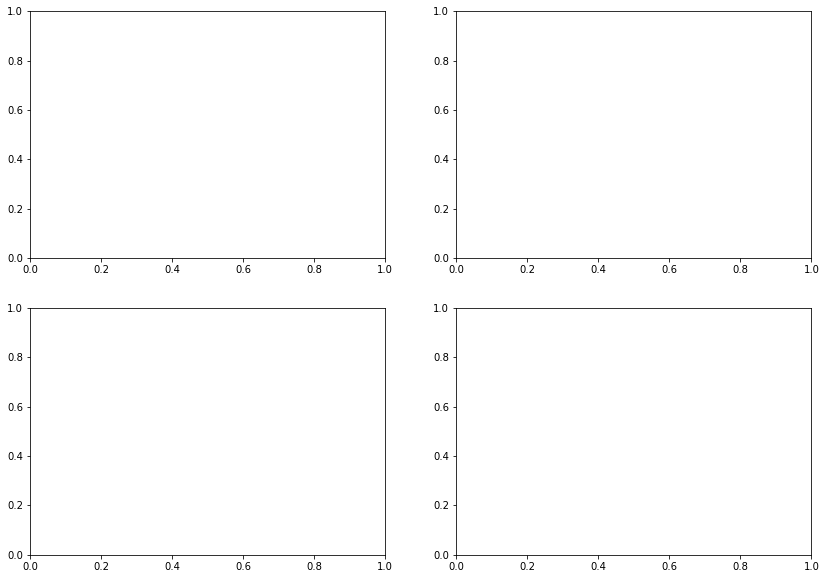

In [44]:
#All the above dataframes will be grouped together and plotted together in a sinlge frame using subplots.

fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot(style=[':', '--', '-','.','*'],
            ax=axes[0,0],
            title='Yearly Emmissions')

monthly.plot(style=[':', '--', '-','.','*'],
             ax=axes[0,1],
             title='Monthly Emmissions')

weekly.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,0],
            title='Weekly Emmissions')

daily.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,1],
            title='Daily Emmissions')


> The most important thing to note here is the sudden increase in spm emmissions after 2003 (**Daily Emmissions plot**), indicating of some spm emmission mode that increased drastically in India.
> It would be very useful to check for some resource online that indicates a change in the environment policy around 2003, specifically towards spm measurements. 

NameError: name 'yearly' is not defined

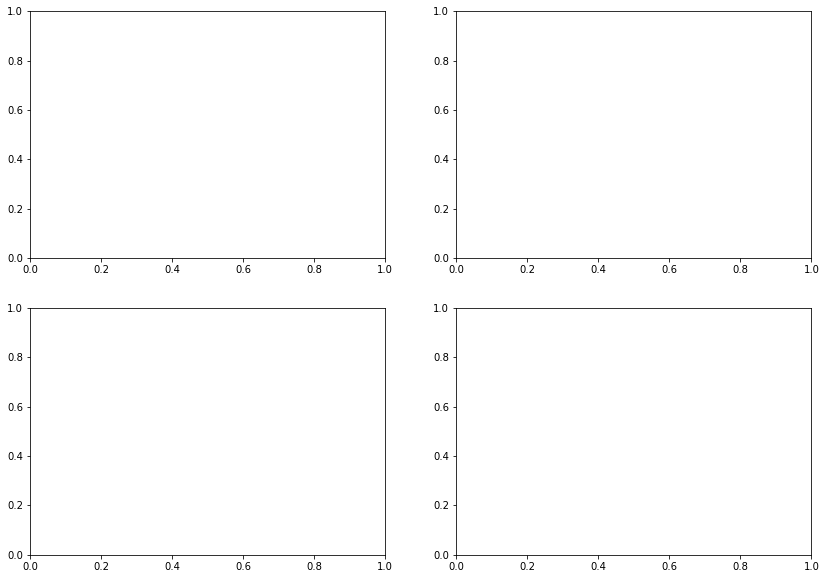

In [45]:
#Putting together all the emissions data, datewise and visualising the data distributions, outliers and median values
fig,axes2=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot.box(
                ax=axes2[0,0],
                title='Yearly Emmissions Distribution')

monthly.plot.box(
                ax=axes2[0,1],
                title='Monthly Emmissions Distribution')

weekly.plot.box(
                ax=axes2[1,0],
                title='Weekly Emmissions Distribution')

daily.plot.box(
                ax=axes2[1,1],
                title='Daily Emmissions Distribution')

> Again, the daily emmissions distributions shows a high number of outliers for spm measurements. Is it truely that variable across India or there are still different ways of mensurements OR
 different times of measurments?

Getting the statistics out of each of the yearly merged datasets. The idea is to get a firsthand understanding of whether the years with highest pollutant emmisions have any relation to the changing evironment policy structures or the growth in the industrial and vehicular presence.

In [46]:

Top5Years_highest_SO2=yearly.sort_values(by='so2', ascending=False).head(5)
Top5Years_highest_SO2.loc[:,'so2']




NameError: name 'yearly' is not defined

In [47]:
Top5Years_highest_NO2=yearly.sort_values(by='no2', ascending=False).head(5)
Top5Years_highest_NO2.loc[:,'no2']


NameError: name 'yearly' is not defined

In [48]:

Top10Years_highest_spm=yearly.sort_values(by='spm', ascending=False).head(10)
Top10Years_highest_spm.loc[:,'spm']


NameError: name 'yearly' is not defined

In [49]:
Top10Years_highest_rspm=yearly.sort_values(by='rspm', ascending=False).head(10)
Top10Years_highest_rspm.loc[:,'rspm']

NameError: name 'yearly' is not defined

The most identifiable trend here, is that 'rspm' measurements have increased dratically after 2000, while all the other three pollutants were recorded highest in 1980s and 1990s.

Getting the statistics out of each of the mothly merged datasets, now. The idea is to get a firsthand understanding of whether the moths with highest pollutant emmisions have any relation to the changing of the seasons?

In [50]:
#Getting the statistics out of each of the monthly merged datasets
Top10Months_highest_SO2=monthly.sort_values(by='so2', ascending=False).head(10)
Top10Months_highest_SO2.loc[:,'so2']






NameError: name 'monthly' is not defined

In [ ]:
Top10Months_highest_NO2=monthly.sort_values(by='no2', ascending=False).head(10)
Top10Months_highest_NO2.loc[:,'no2']

In [ ]:
Top20Months_highest_spm=monthly.sort_values(by='spm', ascending=False).head(20)
Top20Months_highest_spm.loc[:,'spm']

In [ ]:
Top20Months_highest_rspm=monthly.sort_values(by='rspm', ascending=False).head(20)
Top20Months_highest_rspm.loc[:,'rspm']

> SO2 emmissions demonstrate highest occurence during the winter season in India and that is espeiaaly true for rspm measurements.
* Most importantly, rspm level increase in the winters needs a cross examination with the prevelant winter activities like crop cutting etc.
> Other than these defingin trends, much less can be inferred about spm measurements with seasonal changes, indicating other potential sources of pollution.